# Fashion MNIST - Description
**Objective**

Fashion-MNIST is a dataset of Zalando's article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

The objective of the project is - to use Fashion-MNIST data set to identify (predict) different fashion products(articles) from the given images using Machine Learning.

### 1. Importing libraries

In [3]:
import numpy as np    
import pandas as pd
import gzip
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
#create a functions to show images
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

### 2. Load the Dataset

In [11]:
filePath_train_set = 'C:/Users/Мирдин/csv for DS projects/MNIST Fashion/train-images-idx3-ubyte.gz'
filePath_train_label = 'C:/Users/Мирдин/csv for DS projects/MNIST Fashion/train-labels-idx1-ubyte.gz'

filePath_test_set = 'C:/Users/Мирдин/csv for DS projects/MNIST Fashion/t10k-images-idx3-ubyte.gz'
filePath_test_label = 'C:/Users/Мирдин/csv for DS projects/MNIST Fashion/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
    trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
    trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
    testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
    testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)


### 3. Explore the Dataset

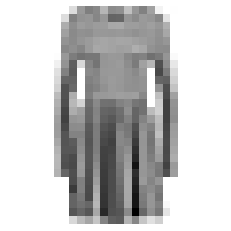

3

In [28]:
showImage(X_train[0])
y_train[0]

### 4. Feature Scale the Dataset

In [21]:
 np.random.seed(42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

### 5. Train various Models on the Dataset

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [25]:
from sklearn.linear_model import LogisticRegression

#### Logistic regression

In [26]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
log_clf.fit(X_train_scaled, y_train)

# Let us predict some instance from the dataset using the above trained model
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


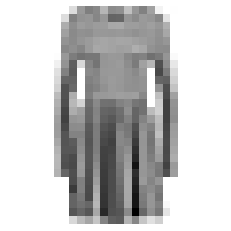

In [27]:
y_train[0] 

y_train_predict[0]

showImage(X_train[0])

In [29]:
y_train_predict = log_clf.predict(X_train_scaled)

In [30]:
log_accuracy = accuracy_score(y_train, y_train_predict)

log_precision = precision_score(y_train, y_train_predict, average='weighted')

log_recall = recall_score(y_train, y_train_predict, average='weighted')

log_f1_score = f1_score(y_train, y_train_predict, average='weighted')

In [32]:
print(log_accuracy)
print(log_precision)
print(log_recall)
print(log_f1_score)

0.8775333333333334
0.876648632278309
0.8775333333333334
0.8769281105807729


#### RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators =20, max_depth = 10, random_state = 42)

In [34]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42)

In [35]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

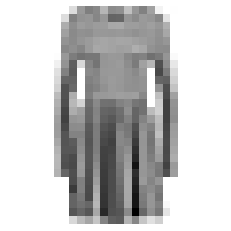

In [36]:
y_train[0] 

y_train_predict[0]

showImage(X_train[0])

In [39]:
y_train_predict = rnd_clf.predict(X_train)

In [40]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)

rnd_precision = precision_score(y_train, y_train_predict, average='weighted')

rnd_recall = recall_score(y_train, y_train_predict, average='weighted')

rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')

In [41]:
print(rnd_accuracy)
print(rnd_precision)
print(rnd_recall)
print(rnd_f1_score)

0.8795166666666666
0.8811612590512217
0.8795166666666666
0.8780076958660805


### 6. Select the model

In [42]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [45]:
log_clf = LogisticRegression(C = 10, multi_class = 'multinomial', solver = 'lbfgs', random_state = 42)

In [49]:
log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [51]:
display_scores(log_cv_scores)

Scores: [0.84525 0.85565 0.8459 ]
Mean: 0.8489333333333332
Standard deviation: 0.0047568079866883925


In [53]:
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv = 3)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [54]:
confusion_matrix(y_train, y_train_pred)

array([[4871,   23,  122,  262,   29,   11,  601,    4,   68,    9],
       [  17, 5814,   21,  107,   12,    1,   21,    3,    3,    1],
       [  97,   22, 4456,   61,  714,    8,  591,    4,   46,    1],
       [ 236,   84,   85, 5201,  190,    3,  170,    3,   24,    4],
       [  19,   12,  537,  189, 4679,    4,  522,    2,   35,    1],
       [   6,    5,    3,    5,    1, 5533,    5,  258,   50,  134],
       [ 833,   18,  684,  202,  577,    7, 3563,    4,  109,    3],
       [   1,    0,    1,    1,    0,  214,    0, 5560,   14,  209],
       [  52,    5,   35,   39,   26,   63,  121,   29, 5608,   22],
       [   0,    1,    0,    1,    0,  122,    1,  216,    8, 5651]],
      dtype=int64)

In [55]:
log_cv_accuracy = log_cv_scores.mean()

log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')

log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')

log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [56]:
print(log_cv_accuracy)
print(log_cv_precision)
print(log_cv_recall)
print(log_cv_f1_score)

0.8489333333333332
0.8478801121152836
0.8489333333333333
0.8482842929493483


In [57]:
rnd_clf = RandomForestClassifier( n_estimators = 20, max_depth = 10, random_state = 42)

rnd_cv_scores = cross_val_score(rnd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

In [58]:
display_scores(rnd_cv_scores)

Scores: [0.8429  0.8508  0.85005]
Mean: 0.8479166666666668
Standard deviation: 0.0035605087027308674


In [59]:
y_train_pred = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv = 3)

In [60]:
confusion_matrix(y_train, y_train_pred)

array([[5018,    4,  101,  336,   43,    7,  422,    1,   68,    0],
       [  18, 5686,   54,  203,   13,    0,   24,    0,    2,    0],
       [  29,    6, 4424,   62, 1110,    0,  324,    0,   45,    0],
       [ 144,   23,   66, 5410,  227,    1,  118,    0,   11,    0],
       [  11,    5,  479,  322, 4858,    1,  298,    0,   25,    1],
       [   0,    0,    1,    0,    0, 5511,    0,  326,   46,  116],
       [1111,    8,  827,  196,  677,    1, 3068,    0,  112,    0],
       [   0,    0,    0,    0,    0,  102,    0, 5496,   10,  392],
       [   8,    4,   44,   27,   32,   25,   59,   18, 5775,    8],
       [   1,    0,    3,    3,    3,   56,    1,  294,   10, 5629]],
      dtype=int64)

In [61]:
rnd_cv_accuracy = rnd_cv_scores.mean()

rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')

rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')

rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [62]:
print(rnd_cv_accuracy)
print(rnd_cv_precision)
print(rnd_cv_recall)
print(rnd_cv_f1_score)

0.8479166666666668
0.8477892358032014
0.8479166666666667
0.8454298647462744


#### The conclusion

In [63]:
print("=== Softmax === ")
display_scores(log_cv_scores)
print("log_cv_accuracy:", log_cv_accuracy)
print("log_cv_precision:", log_cv_precision)
print("log_cv_recall:", log_cv_recall)
print("log_cv_f1_score:", log_cv_f1_score)

print("=== Random Forest === ")
display_scores(rnd_cv_scores)
print("rnd_cv_accuracy:", rnd_cv_accuracy)
print("rnd_cv_precision:", rnd_cv_precision)
print("rnd_cv_recall :", rnd_cv_recall )
print("rnd_cv_f1_score:", rnd_cv_f1_score)

=== Softmax === 
Scores: [0.84525 0.85565 0.8459 ]
Mean: 0.8489333333333332
Standard deviation: 0.0047568079866883925
log_cv_accuracy: 0.8489333333333332
log_cv_precision: 0.8478801121152836
log_cv_recall: 0.8489333333333333
log_cv_f1_score: 0.8482842929493483
=== Random Forest === 
Scores: [0.8429  0.8508  0.85005]
Mean: 0.8479166666666668
Standard deviation: 0.0035605087027308674
rnd_cv_accuracy: 0.8479166666666668
rnd_cv_precision: 0.8477892358032014
rnd_cv_recall : 0.8479166666666667
rnd_cv_f1_score: 0.8454298647462744


### 7. PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components = 0.99)

In [66]:
X_train_reduced = pca.fit_transform(X_train)

print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

459
0.9900347820630973


In [67]:
X_train_recovered = pca.inverse_transform(X_train_reduced)

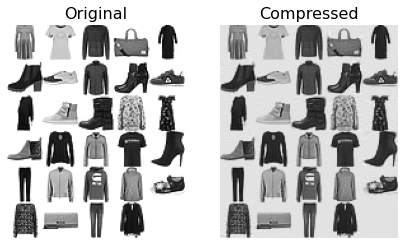

In [68]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

### 8. Tuning hyperparameters

In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10, 15],
    }]

In [71]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)

rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)

In [72]:
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [74]:
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv = 3, scoring = 'neg_mean_squared_error')

In [75]:
grid_search.fit(X_train_reduced, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=10,
                                                                        multi_class='multinomial',
                                                                        random_state=42)),
                                                    ('rf',
                                                     RandomForestClassifier(max_depth=10,
                                                                            n_estimators=20,
                                                                            random_state=42))],
                                        voting='soft'),
             param_grid=[{'lr__C': [5], 'lr__multi_class': ['multinomial'],
                          'lr__solver': ['lbfgs'], 'rf__max_depth': [10, 15],
                          'rf__n_estimators': [20]}],
             scoring='neg_mean_squared_error')

In [78]:
grid_search.best_params_

{'lr__C': 5,
 'lr__multi_class': 'multinomial',
 'lr__solver': 'lbfgs',
 'rf__max_depth': 15,
 'rf__n_estimators': 20}

In [77]:
grid_search.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, multi_class='multinomial',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=20,
                                                     random_state=42))],
                 voting='soft')

In [79]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.3738146405780753 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.3673392653861245 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


### 9. Evaluating and final model

In [80]:
final_model = grid_search.best_estimator_

In [81]:
X_test_reduced = pca.transform(X_test)

In [82]:
y_test_predict = final_model.predict(X_test_reduced)

In [83]:
confusion_matrix(y_test, y_test_predict)

array([[821,   3,  16,  50,   3,   2,  93,   0,  12,   0],
       [  3, 959,   5,  24,   5,   0,   4,   0,   0,   0],
       [ 30,   3, 737,  11, 122,   3,  81,   2,  11,   0],
       [ 27,  11,  17, 874,  29,   1,  34,   0,   7,   0],
       [  0,   1, 108,  35, 774,   2,  71,   1,   8,   0],
       [  0,   0,   0,   1,   0, 924,   0,  49,   5,  21],
       [154,   2, 122,  34,  96,   1, 563,   1,  27,   0],
       [  0,   0,   0,   0,   0,  29,   0, 936,   0,  35],
       [  5,   3,   3,  12,   3,   4,  14,   8, 946,   2],
       [  0,   0,   0,   0,   0,  15,   0,  40,   2, 943]], dtype=int64)

In [84]:
final_accuracy = accuracy_score(y_test,y_test_predict)

final_precision = precision_score(y_test,y_test_predict,average='weighted')

final_recall = recall_score(y_test,y_test_predict,average='weighted')

final_f1_score=f1_score(y_test,y_test_predict,average='weighted')

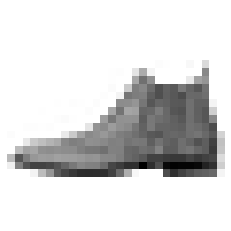

In [85]:
y_test[0]

y_test_predict[0]

showImage(X_test[0])

In [87]:
print('=== Final model ===') 
print("final_model_accuracy:", final_accuracy)
print("final_model_precision:", final_precision)
print("final_model_recall:", final_recall)
print("final_model_f1_score:", final_f1_score)

=== Final model ===
final_model_accuracy: 0.8477
final_model_precision: 0.845721148967947
final_model_recall: 0.8477
final_model_f1_score: 0.846225677431783
